### Model3

In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import random as rn
import numpy as np
import pandas as pd

combined_df = pd.read_csv('combined_df.csv') 
combined_df.head(15)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1


In [2]:
feature_df = pd.read_csv('feature_df.csv') 
feature_df.head(5)

,id,ambg,lex_div,neg,neu,pos,compound,tfid,label
0,411,129.500000,0.958333,0.0000,0.942500,0.057500,0.25530,0.025000,1
1,502,196.000000,0.814815,0.0000,1.000000,0.000000,0.00000,0.040909,1
2,506,281.500000,0.821870,0.0000,0.922500,0.077500,0.43160,0.011544,1
3,530,88.166667,0.953922,0.0000,0.946667,0.053333,0.10195,0.012000,1
4,541,169.500000,0.910401,0.0795,0.876500,0.044000,-0.08895,0.015957,1


In [3]:
combined_df['label'].value_counts() 

0    22645
1    21416
Name: label, dtype: int64

In [4]:
#balanced_df = combined_df.groupby('label').head(3000)
#balanced_df['label'].describe()

In [5]:
import pickle

with open('paraList.pkl', 'rb') as f:
    paraList = pickle.load(f)

In [6]:
# List of just words, some bug..
len(paraList)

23114

In [7]:
from nltk.tokenize import sent_tokenize

sentence_list = []
paragraph_list = []

for i in range(0, len(combined_df)):
    sentences = sent_tokenize(combined_df.iloc[i]['text'])
    paragraph_list.append(combined_df.iloc[i]['text'])
    for s in sentences:
        sentence_list.append(s)
                              
    if(i%500 == 0):
        print(i, end=" ")
    

0 500 1000 1500 2000 2500 3000 3500 4000 4500 5000 5500 6000 6500 7000 7500 8000 8500 9000 9500 10000 10500 11000 11500 12000 12500 13000 13500 14000 14500 15000 15500 16000 16500 17000 17500 18000 18500 19000 19500 20000 20500 21000 21500 22000 22500 23000 23500 24000 24500 25000 25500 26000 26500 27000 27500 28000 28500 29000 29500 30000 30500 31000 31500 32000 32500 33000 33500 34000 34500 35000 35500 36000 36500 37000 37500 38000 38500 39000 39500 40000 40500 41000 41500 42000 42500 43000 43500 44000 

In [8]:
%%time
'''

takes the words of each sentence and creates a vocabulary of all the unique words in the sentences. 
This vocabulary can then be used to create a feature vector of the count of the words:

'''
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import re

vectorizer = CountVectorizer(min_df=0, max_features=1000, lowercase=False)
vectorizer.fit(sentence_list)
#vectorizer.vocabulary_

CPU times: user 9.97 s, sys: 120 ms, total: 10.1 s
Wall time: 10.1 s


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=False, max_df=1.0, max_features=1000, min_df=0,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [9]:
vectorizer.transform([paragraph_list[0]]).toarray().shape

(1, 1000)

In [10]:
train_dataset = vectorizer.transform(paragraph_list).toarray()
print(train_dataset[0])

[ 0  2  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0
  0  0  0  0  0  0  2  0  0  0  0  0  2  0  1  5  0  0  1  0  0  0  0  0
  0  0  0  0  0  2  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  6  0  0
  0  0  2  0  0  0  0  1  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  1  0  0  1  0
  0  0  1  0  0  1  6  8  1  0  0  0  2  0  0  0  0  0  3  0  1  0  0  0
  0  0  0  1  2  0  0  0  0  0  0  1  1  6  0  0  0  1  0  0  0  0  7  0
  0  1  0  0  1  0  0  1  1  0  2  2  0  0  1  0  1  0  0  0  0  3  0  0
  0  0  0  0  0  0  0  0  0  0  2  0  1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  3  0  0  2  1 16  0  0  0  0  0  0  0  2  0
  0  0  7  0  0  0  0  0  0  0  0  1  0  0  0  0  6  0  0  0  1  0  0  0
  0  0  0  0  0  0  1  1  2  2  0  1  1  0  1  5  0  0  1  6  0  1  0  1
  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0

In [11]:
from sklearn.model_selection import train_test_split

y = combined_df['label'].values

X_train, X_test, y_train, y_test = train_test_split(
   train_dataset, y, test_size=0.25, random_state=1000)

print(len(X_train), len(X_test), len(y_train), len(y_test))

33045 11016 33045 11016


In [12]:
X_train[0].shape

(1000,)

In [13]:
np.sum(X_test, axis=1)

array([289, 469, 278, ..., 499, 250, 266])

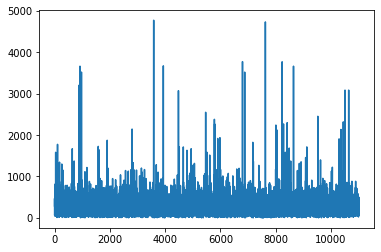

In [14]:
fig, ax = plt.subplots()
ax.plot(np.sum(X_test, axis=1))

In [15]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=5000)
classifier.fit(X_train, y_train)
score = classifier.score((X_test), y_test)

print("Accuracy:", score)

Accuracy: 0.9944625998547567


In [16]:
np.mean(y_train)

0.48367377818126794

In [17]:
X_test[0].shape[0]

1000

In [18]:
from keras.models import Sequential
from keras import layers

input_dim = X_train[0].shape[0]  # Number of features

model = Sequential()
model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
model.add(layers.Dropout(rate = 0.4))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                64064     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 66,177
Trainable params: 66,177
Non-trainable params: 0
_________________________________________________________________


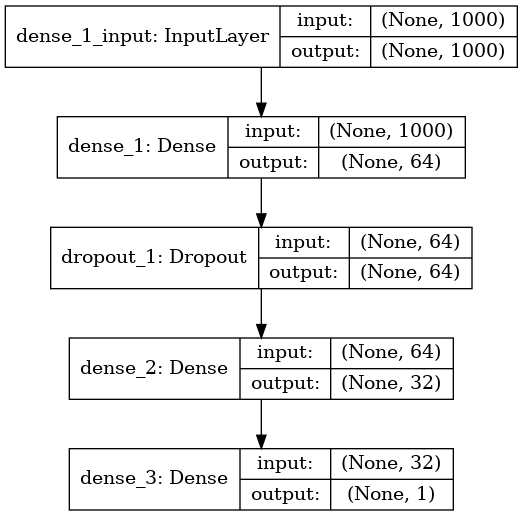

In [19]:
from keras.utils import plot_model

plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True)

In [20]:
np.array(X_train).shape

(33045, 1000)

In [31]:
vocab = list(vectorizer.vocabulary_)

In [35]:
vocab[997]

'pic'

In [23]:
test = pd.DataFrame(X_train)
test['label'] = y_train

test.head(2)

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,label
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,4,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
test['label'].value_counts()

0    17062
1    15983
Name: label, dtype: int64

In [26]:
cor = abs(test.corr()["label"])


0        0.036195
1        0.006210
2        0.008025
3        0.044967
4        0.012860
           ...   
996      0.060323
997      0.276235
998      0.075830
999      0.188338
label    1.000000
Name: label, Length: 1001, dtype: float64


In [21]:
from keras.callbacks import ModelCheckpoint

newtrainX = np.array(X_train)
newtestX = np.array(X_test)
checkpoint = ModelCheckpoint('model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  

In [22]:
try:
    history = model.fit(newtrainX, y_train,
                epochs=500,
                verbose=True,
                validation_data=(newtestX, y_test),
                batch_size=128,
                callbacks=[checkpoint])


except KeyboardInterrupt:
    pass

Train on 33045 samples, validate on 11016 samples
Epoch 1/500
33045/33045 [==============================] - 1s 24us/step - loss: 0.1786 - accuracy: 0.9429 - val_loss: 0.0713 - val_accuracy: 0.9851

Epoch 00001: val_loss improved from inf to 0.07132, saving model to model-001-0.942926-0.985113.h5
Epoch 2/500
33045/33045 [==============================] - 1s 15us/step - loss: 0.0559 - accuracy: 0.9851 - val_loss: 0.0489 - val_accuracy: 0.9877

Epoch 00002: val_loss improved from 0.07132 to 0.04893, saving model to model-002-0.985081-0.987745.h5
Epoch 3/500
33045/33045 [==============================] - 1s 16us/step - loss: 0.0328 - accuracy: 0.9918 - val_loss: 0.0332 - val_accuracy: 0.9919

Epoch 00003: val_loss improved from 0.04893 to 0.03319, saving model to model-003-0.991799-0.991921.h5
Epoch 4/500
33045/33045 [==============================] - 1s 16us/step - loss: 0.0229 - accuracy: 0.9938 - val_loss: 0.0247 - val_accuracy: 0.9937

Epoch 00004: val_loss improved from 0.03319 to 0.

In [36]:
loss, accuracy = model.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test, y_test, verbose = False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 1.0000
Testing Accuracy:  0.9961


In [38]:
from newspaper import Article

article = Article('https://www.nytimes.com/2020/11/28/us/trump-biden-border-wall.html')
article.download()
article.parse()

text_body = article.text

print(sentences[0])

But even if Mr. Biden wants to do so, he could face logistical and financial challenges including the payment of termination fees for canceling some contracts.


In [46]:
sample_vectorized = vectorizer.transform([text_body])
print(sample_vectorized.shape)

(1, 1000)


In [47]:
model.predict(sample_vectorized)

array([[0.47034785]], dtype=float32)

In [49]:
df_true = pd.read_csv("~/FakeNewsProject/data/s_1/True.csv")

In [58]:
df_false = pd.read_csv("~/FakeNewsProject/data/s_1/Fake.csv") 

In [59]:
random_sample = df_false.iloc[55]['text']
random_vectorized = vectorizer.transform([random_sample])
print(random_vectorized.shape)

res = model.predict([random_vectorized])[0][0]
print("Prediction:  {:.4f}".format(res*100))

(1, 1000)
Prediction:  0.0000


In [ ]:
# 1 = true, 0 = false

In [60]:
import pickle

with open('vectorizer', 'wb') as f:
    pickle.dump(vectorizer, f)

In [61]:

with open('model3', 'wb') as f:
    pickle.dump(model, f)